In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [6]:
df = df.drop_duplicates()
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

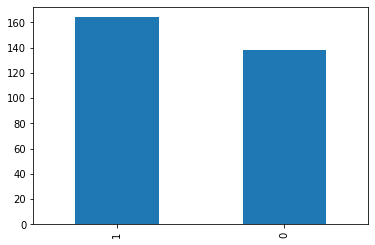

In [7]:
df['output'].value_counts().plot(kind='bar')

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
X = df.drop('output', axis= 1).copy()
y = df['output'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
clf  = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [11]:
pred_test = clf.predict(X_test)

In [12]:
print(classification_report(y_test, pred_test))
print('F1_score : ', f1_score(y_test, pred_test))
print('Precision: ', precision_score(y_test, pred_test))
print('Recall : ', recall_score(y_test, pred_test))
print('Accuracy : ', accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76

F1_score :  0.8666666666666666
Precision:  0.8297872340425532
Recall :  0.9069767441860465
Accuracy :  0.8421052631578947


In [13]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df),columns=df.columns, index=df.index)

In [14]:
X = df1.drop('output', axis= 1).copy()
y = df1['output'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
clf = SVC(kernel='rbf')

In [16]:
params = {'C': range(1, 3000, 100), 'gamma': np.arange(0.001, 1, 0.1)}

In [17]:
grid_dearch_cv = GridSearchCV(clf, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_dearch_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 3000, 100),
                         'gamma': array([0.001, 0.101, 0.201, 0.301, 0.401, 0.501, 0.601, 0.701, 0.801,
       0.901])},
             scoring='accuracy')

In [18]:
grid_dearch_cv.best_params_

{'C': 2501, 'gamma': 0.001}

In [19]:
best_svc_clf = grid_dearch_cv.best_estimator_

pred_test = best_svc_clf.predict(X_test)

In [20]:
print(classification_report(y_test, pred_test))
print('F1_score : ', f1_score(y_test, pred_test))
print('Precision: ', precision_score(y_test, pred_test))
print('Recall : ', recall_score(y_test, pred_test))
print('Accuracy : ', accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81        33
         1.0       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76

F1_score :  0.8666666666666666
Precision:  0.8297872340425532
Recall :  0.9069767441860465
Accuracy :  0.8421052631578947


In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
numeric_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

<AxesSubplot:>

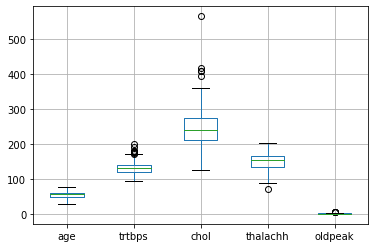

In [23]:
df.boxplot(numeric_columns)

C:\Users\Amir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amir\anaconda3\lib\site-p

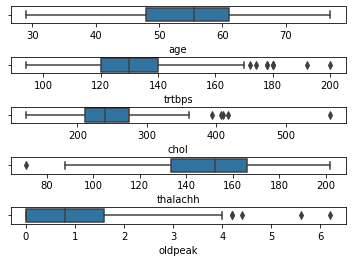

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=len(numeric_columns))

for i in range(len(numeric_columns)):
    sns.boxplot(df[numeric_columns[i]], ax=ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

In [25]:
df.shape

(302, 14)

In [26]:
df = df[df['trtbps'] < 170]
df = df[df['chol'] < 350]
df = df[df['thalachh'] > 85]
df = df[df['oldpeak'] <= 4]

In [27]:
df.shape

(276, 14)

In [28]:
X = df.drop('output', axis= 1).copy()
y = df['output'].copy()

X_train , X_test , y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf  = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

pred_test = clf.predict(X_test)

print(classification_report(y_test, pred_test))
print('F1_score : ', f1_score(y_test, pred_test))
print('Precision: ', precision_score(y_test, pred_test))
print('Recall : ', recall_score(y_test, pred_test))
print('Accuracy : ', accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.84      0.97      0.90        37

    accuracy                           0.88        69
   macro avg       0.90      0.88      0.88        69
weighted avg       0.89      0.88      0.88        69

F1_score :  0.9
Precision:  0.8372093023255814
Recall :  0.972972972972973
Accuracy :  0.8840579710144928
